In [2]:
import sys
sys.path.append('/../QmeQ/qmeq/')
#sys.path.append('../qmeq/')
import qmeq
import numpy as np
import matplotlib.pyplot as plt

In [3]:
u_intra = 2000
u_inter = 1000
V_B = 1000
mu_L = -V_B/2       
mu_R = V_B/2        

gammaL = 0.5
gammaR = gammaL
tL = np.sqrt(gammaL/np.pi/2)
tR = np.sqrt(gammaR/np.pi/2)
T_L = 100
T_R = T_L
n = 4
nleads = 4

U = {(0,1,1,0):u_intra, (2,3,3,2):u_intra, (0,2,2,0):u_inter, (0,3,3,0):u_inter, (1,2,2,1):u_inter, (1,3,3,1):u_inter } 
mulst = {0:mu_L, 1:mu_L, 2:mu_R, 3:mu_R}
tlst = {0:T_L, 1:T_L, 2:T_R, 3:T_R}

epsilons = np.linspace(-6000, 6000, 10)
V_B = np.linspace(-100,100, 10)
omega = 0.5


system = qmeq.Builder(nsingle=n, hsingle={(0,0):100, (1,1):100, (2,2):100, (3,3):100, (0,2):omega, (1,3):omega}, coulomb=U, nleads=nleads,
                        mulst=mulst, tlst=tlst, tleads={(0, 0):tL,
                      (1, 1):tL, (2, 2):tR, (3, 3):tR}, dband=1e4,
                       countingleads=[0,1], kerntype='pyLindblad')


In [4]:
system.solve()

In [5]:
system.current,system.current_noise

(array([-0.08985887, -0.08985887,  0.08985887,  0.08985887]),
 array([-0.17971773,  0.09098087]))

In [6]:
I,I_noise=[],[]
V_B = np.linspace(-10000,10000, 100)
epsilons = np.linspace(-6000, 6000, 10)
omega = 1000
for epsilon in epsilons:
    for vb in V_B:
        system = qmeq.Builder(nsingle=n, hsingle={(0,0):epsilon, (1,1):epsilon, (2,2):epsilon, (3,3):epsilon, (0,2):omega, (1,3):omega}, coulomb=U, 
                            nleads=nleads, mulst={0:-vb/2, 1:-vb/2, 2:vb/2, 3:vb/2}, tlst=tlst, tleads={(0, 0):tL, (1, 1):tL, (2, 2):tR, (3, 3):tR}, 
                            dband=1e4, countingleads=[0,1], kerntype='pyLindblad')
        system.solve()
        I.append(system.current)
        I_noise.append(system.current_noise)

In [7]:
I_L = np.array([i[0]+i[1] for i in I]).reshape(len(epsilons), len(V_B)).T
I_L_noise = np.array([i[0] for i in I_noise]).reshape(len(epsilons), len(V_B)).T
S_L_noise = np.array([i[1] for i in I_noise]).reshape(len(epsilons), len(V_B)).T

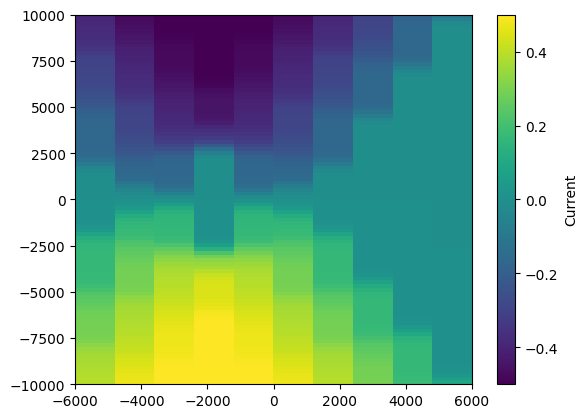

In [10]:
plt.imshow(I_L, extent=[epsilons[0], epsilons[-1], V_B[0], V_B[-1]], aspect='auto', origin='lower')
plt.colorbar(label='Current')

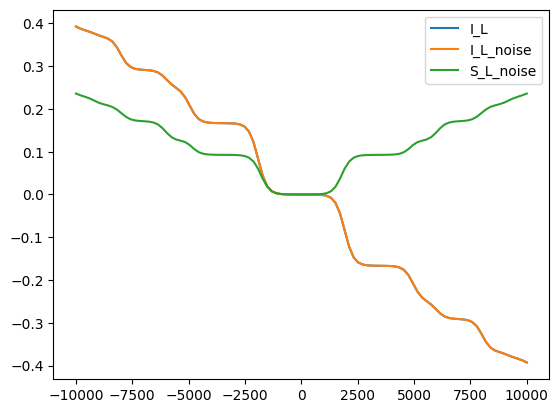

In [9]:
plt.plot(V_B, I_L[:,0])
plt.plot(V_B, I_L_noise[:,0])
plt.plot(V_B, S_L_noise[:,0])
plt.legend(['I_L', 'I_L_noise', 'S_L_noise'])